# Multi Armed Bandit Made Easy with Thompson Sampling.

# > What is a Multi armed Bandit Problem?

**Consider that we have to figure out a way to allocate the limited resources (such as time, money, turns etc.) in a set of competing options in such a way that we can maximize our expected ways. In these scenarios Multi-Armed Bandit problem occurs.**



**Multi Armed bandit is a type of reinforcement learning problem which is based on exploitation and exploration trade-off in sequential decision problems. The gambler pulls the arm of the bandit machine there are several probabilities of rewards associated with that trial. So the gambler has provided input to K- arms of bandit machines in the hope of winning huge amounts, our aim here becomes to maximize the winning .If we know the probability of what amount we will receive after pulling an arm our goal can be easily achieved.**

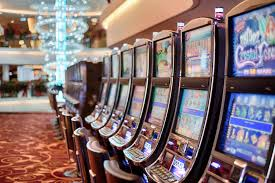

# HISTORY

**The Thompson Sampling algorithm is the most effective and dates back to 1933 given by W.R Thompson. The algorithm is related to Bayesian setting where there is known prior probabilities and the reward distribution is randomized such that the arm selected has the maximum probability.**

# Why Thompson Sampling?

***Multi Bandit problems can be solved using the simplest algorithm which is the greedy algorithm. Its name justifies what it does it takes the shortest distance to compute the problem. ***
> The Epsilon greedy algorithm follows the below mentioned steps:
*  **a) Compute the expected reward.***
*  **b) Pick the arm with 1-ε with the highest expectations**
*  **c) Apply the arm and observe reward.**
*  **d) Update distribution.**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQOcCq2b1AQ-wf2_qYD2YwaEhbIRUgm5YWwIA&usqp=CAU)

> The greedy algorithm wastes the resources by failing to write off actions regardless of how unlikely they are to be optimal.
To overcome the cons of the Epsilon-Greedy algorithm Thompson Sampling comes to rescue.


# How does the Thompson Sampling works?

**> The main difference from Epsilon greedy is that in Thompson sampling we will for each bandit sample the probability from the prior and pull the bandit to generate the reward. The differences of Thompson Sampling algorithm from the E-Greedy algorithm are that it’s a Bayesian approach and it doesn’t take the shortest route to fetch us the reward.**
* Steps for Thompson Sampling:
* a)	We need to set a prior distribution between 0 and 1 for each variant k’s payout rate.
* b)	A parameter Theta is selected from each k’s posterior distribution.
* c)	Select the variant k that is associated with the highest parameter theta.
* d)	Observe the reward and update the distribution parameters.


Below is the code on Thompson Sampling .

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
nb_bandits = 4  
p_bandits = [0.40, 0.50, 0.60,0.78]


def pull(i):
    if np.random.rand() < p_bandits[i]:
        return 1
    else:
        return 0

In [ ]:
plots = [1, 2, 5, 10, 25, 50, 100, 200, 500, 1000]


def plot(priors, step, ax):
    plot_x = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(plot_x)
        p = ax.plot(plot_x, y)
        ax.fill_between(plot_x, y, 0, alpha=0.2)
    ax.set_xlim([0, 1])
    ax.set_ylim(bottom=0)
    ax.set_title(f'Priors at step {step:d}')

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(8, 10))
axs = axs.flat

# The number of trials and wins will represent the prior for each
#  bandit with the help of the Beta distribution.
trials = [0, 0, 0,0]  # Number of times we tried each bandit
wins = [0, 0, 0,0]  # Number of wins for each bandit

n = 1000
# Run the trail for `n` steps

for step in range(1, n+1):
    # Define the prior based on current observations
    
    bandit_priors = [
        stats.beta(a=1+w, b=1+t-w) for t, w in zip(trials, wins)]
    # plot prior 
    
    if step in plots:
        plot(bandit_priors, step, next(axs))
        
    # Sample a probability theta for each bandit
    theta_samples = [
        d.rvs(1) for d in bandit_priors
    ]
    # choose a bandit
    
    chosen_bandit = np.argmax(theta_samples)
    
    # Pull the bandit
    x = pull(chosen_bandit)
    
    
    # Update trials and wins (defines the posterior)
    trials[chosen_bandit] += 1
    wins[chosen_bandit] += x

plt.tight_layout()
plt.show()

Code explainability:

**1. Describe the Number of bandits**

**2. Then we do have the success probabilties for the each bandit.**

**3. The number of trials and wins will represent the prior for each probabilitytaken here as 0.**

**4. Number trials taken are 1000.**

**5. Using the beta distribution comparing the prior probabilites with the input something like in the pic below is achieved.****

![](https://valelab4.ucsf.edu/svn/3rdpartypublic/boost/libs/math/doc/sf_and_dist/graphs/beta_pdf.png)

**6. After choosing and comparing the bandits update the trials and wins . **

**Uses of the MultiArmed bandit**
* Used at the place of A/B testing used in Market reserach or website Optimization.
* Thompson sampling can be used in areas like market revenue generation and is currently being used in top e commerce sites to increase revenue.
